# Stochastic Gradient Descent

## Theoretical Aspects

The dot products needed to compute $\nabla E_{\text{IN}}(w)$ (see [GD-basic.ipynb](./GD-basic.ipynb)) have some __important costs__. What if we have 1 million points with 100 thousand features? We would have a $10^6 \times 10^5$ matrix which will take some time.

So the question becomes: do we really need to use the entire dataset to compute the gradient of the error function $E_{\text{IN}}(w)$? If we try to __undersample__ the samples in the in-sample error we would have a _fuzzier_ vector but its gradient direction should be the same.

This is the idea of the __Stochastic__ Gradient Descent. We call it _stochastic_ because we sample a number $n < N$ of points, or, in extreme cases, sample 1 random point out of the dataset. Even if it seems crazy, this approach is more efficient than calculating the total gradient descent (and it is been proved!).

This approach is __computationally manageable__ and it will work better. We can escape the saddle points (or the local minima) because we move in a more random way than the classic descent. In a way, we implicitly choose to add some noise when we try to find the absolute minimum in the error function.

## Implementation

The initial setup of the implementation is exactly the same as the one used in the [GD-basic.ipynb](./GD-basic.ipynb) file.

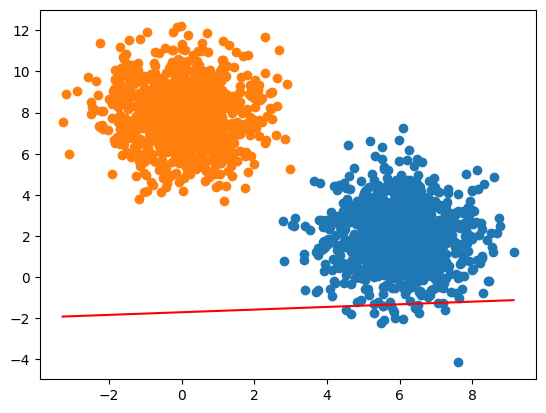

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(314)

# generate N samples per class
N = 1000


# feature 1 and 2 for class 1
X1_1 = np.random.normal(loc = 6, scale = 1, size = N)
X1_2 = np.random.normal(loc = 2, scale = 1.5, size=N)

# generate class 1 labels
Y1 = np.ones(N)

# plot class 1
plt.scatter(X1_1, X1_2)


# second components of X1 and X2
X2_1 = np.random.normal(loc = 0, scale = 1, size = N)
X2_2 = np.random.normal(loc = 8, scale = 1.5, size = N)

# generate class 2 labels
Y2 = -np.ones(N)

# plot class 2
plt.scatter(X2_1, X2_2)


# generates weight 
w = np.random.normal(loc=0.1, size=3)

# plot the initial hyperplane
plt.plot([np.min(X2_1), np.max(X1_1)],
        [np.min(X2_1) * (-w[1]/w[2]) - w[0]/w[2], np.max(X2_1) * (-w[1]/w[2]) - w[0]/w[2]],
        color = 'red')


# generate bias feature
X0 = np.ones(N * 2)

# create feature 1 and 2
X1 = np.concatenate((X1_1, X2_1))
X2 = np.concatenate((X1_2, X2_2))

# create dataset
X = np.stack((X0, X1, X2), axis=1)

# create label vector
y = np.concatenate((Y1, Y2))

### Error function

As in the [GD-basic.ipynb](./GD-basic.ipynb) file the error function is the $SSE$.

$$
    \frac{1}{2}\sum_{i = 1}^N(\text{e}_i)^2
$$

In [2]:
def error_sse(errors):
    error = np.sum(np.square(errors)) / 2
    return error

### Training stage

The stochastic approach requires a __mini-match__, which is the number of samples to evaluate from the original dataset. In this algorithm, after defining the usual variable, we need to specify the <tt>batch_size</tt>. Then, during the training phase, it is suggested to _shuffle__ the dataset at each epoch. This helps to sample random points from the data points, hence removing biases. After shuffling the dataset, the weight vector is updated by selecting a subset of the data points, processing each subset in sequence, and evaluating the gradient for each batch.

In [3]:
# set learning rate 
eta = 1e-4

# size for the undersampling
batch_size = 10

# check epochs
max_epochs = 500
current_epoch = 0

# sum of squared error for each epoch
sse_epoch = np.zeros(max_epochs)

# training
while (current_epoch < max_epochs):
    
    # compute current output
    output = np.dot(X, w)
    
    # compute error: y - Xw
    errors = y - output
    
    # save the SSE
    sse_epoch[current_epoch] = error_sse(errors)
    

    # generate a random permutation such that the dataset will be shuffled in each epoh
    random_permutation = np.random.permutation(range(y.size))
    
    # shuffle dataset and label
    X = X[random_permutation, :]
    y = y[random_permutation]

    # use stochastic algorithm
    for i in range(0, y.size, batch_size):

        # undersmple X
        X_batch = X[i : (i + batch_size), :]

        # undersample y
        y_batch = y[i : (i + batch_size)]
        
        # update rule : 2 / N * eta * (X^T)(y - Xw)
        w += (2 / batch_size) * eta * np.dot( np.transpose(X_batch), y_batch - np.dot(X_batch, w) )
    
    current_epoch += 1

We can now plot the solution to see how the GDS divided the hyperplane. We can see that using the same setup as the normal GD (half the epochs and the same $\eta$) the hyperplane division is more accurate.

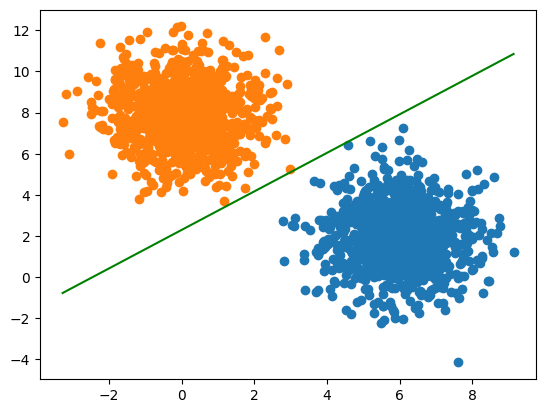

In [4]:
# plots the points
plt.scatter(X1_1, X1_2)
plt.scatter(X2_1, X2_2)

# plots the hyperplane
plt.plot([np.min(X1), np.max(X1)],
         [np.min(X1) * (-w[1]/w[2]) - w[0]/w[2], np.max(X1) * (-w[1]/w[2]) - w[0]/w[2]],
         color = 'green')


We can also plot the Sum of Squared Errors.

[89.26458408 89.21624383 89.17195423 89.11800468 89.06619594 89.02250507
 88.97122696 88.9252686  88.87428829 88.82865837]


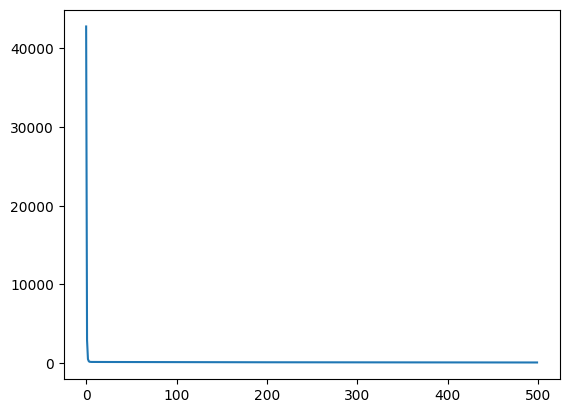

In [5]:
print(sse_epoch[-10:])

# epochs - error plot
plt.plot(range(max_epochs), sse_epoch)